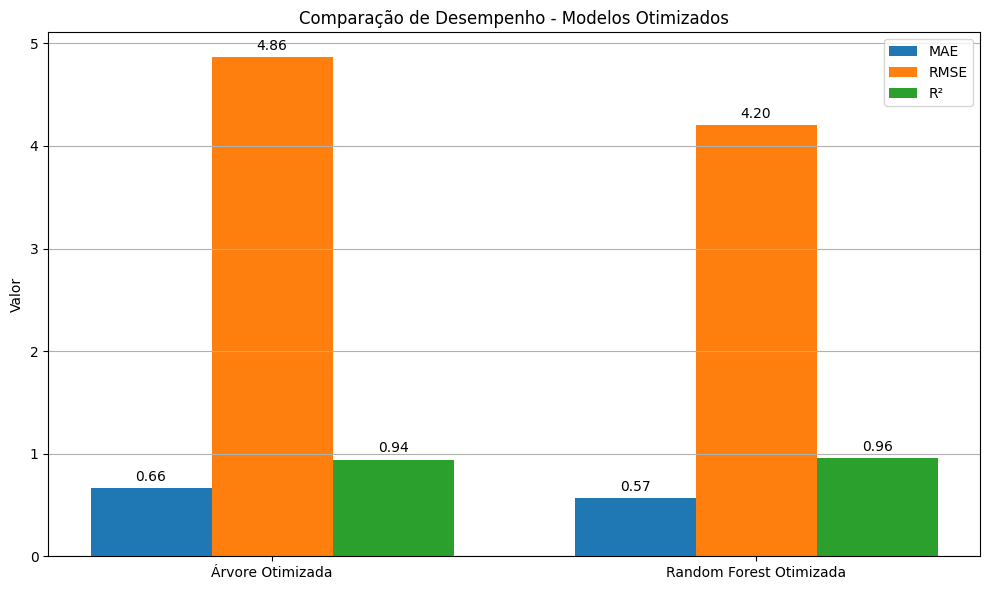

/content/comparacao_otimizados.png


✅ Executado com sucesso em 4.12 minutos.


In [5]:
# ⏱️ Início do tempo de execução
import time
start = time.time()

# 📦 Bibliotecas
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📁 1. Carregar dataframe
df_vendas = joblib.load('df_vendas.z')

# 🛠️ 2. Pré-processar a coluna data_emissao para numérico
df_vendas['data_emissao'] = pd.to_datetime(df_vendas['data_emissao'])
df_vendas['ano'] = df_vendas['data_emissao'].dt.year
df_vendas['mes_dia'] = df_vendas['data_emissao'].dt.day
df_vendas['dia_ano'] = df_vendas['data_emissao'].dt.dayofyear
df_vendas = df_vendas.drop('data_emissao', axis=1)

# 🎯 3. Definir variável-alvo e features
X = df_vendas.drop('quantidade', axis=1)
y = df_vendas['quantidade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 4. Grid Search - Árvore de Decisão
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'friedman_mse']
}
tree = DecisionTreeRegressor(random_state=42)
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='r2', n_jobs=-1)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_

# 🌲 5. Grid Search - Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'criterion': ['squared_error']
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# 📊 6. Avaliação dos modelos
def metricas(modelo):
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

mae_tree, rmse_tree, r2_tree = metricas(best_tree)
mae_rf, rmse_rf, r2_rf = metricas(best_rf)

# 📈 7. Gráfico bonito comparativo (só entre os dois modelos)
modelos = ['Árvore Otimizada', 'Random Forest Otimizada']
mae = [mae_tree, mae_rf]
rmse = [rmse_tree, rmse_rf]
r2 = [r2_tree, r2_rf]

x = np.arange(len(modelos))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, mae, width, label='MAE')
bars2 = ax.bar(x, rmse, width, label='RMSE')
bars3 = ax.bar(x + width, r2, width, label='R²')

ax.set_ylabel('Valor')
ax.set_title('Comparação de Desempenho - Modelos Otimizados')
ax.set_xticks(x)
ax.set_xticklabels(modelos)
ax.legend()
ax.grid(True, axis='y')

def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)

plt.tight_layout()
plt.savefig('comparacao_otimizados.png', dpi=300)
plt.show()

# 🔗 Link para download
from IPython.display import FileLink
display(FileLink('comparacao_otimizados.png'))

# ✅ Mensagem de sucesso com tempo
end = time.time()
tempo_min = (end - start) / 60
print(f"\n✅ Executado com sucesso em {tempo_min:.2f} minutos.")


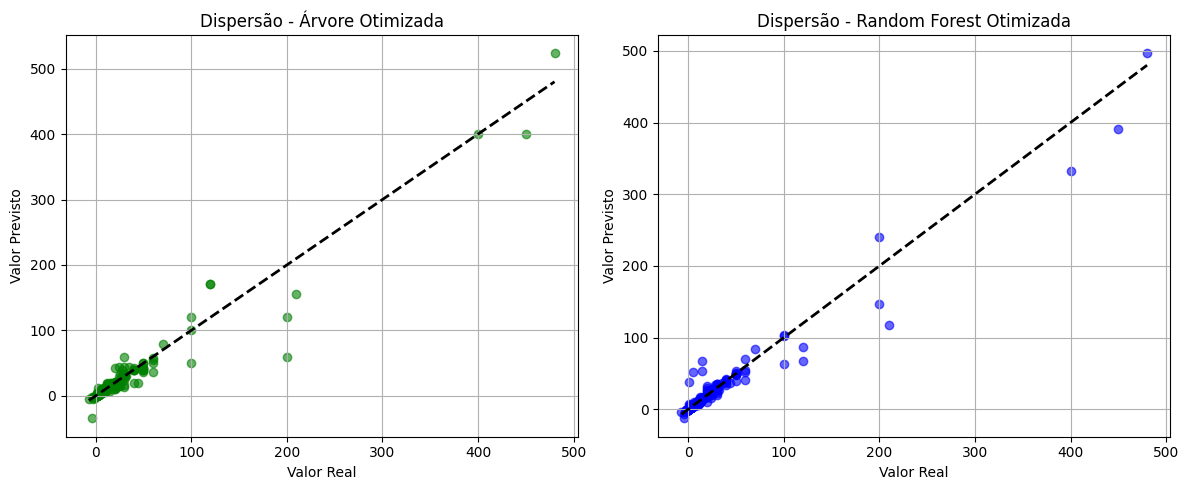

In [7]:
# Previsões com os modelos otimizados
y_pred_tree = best_tree.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Criar figuras
plt.figure(figsize=(12, 5))

# Gráfico da Árvore de Decisão
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Dispersão - Árvore Otimizada')
plt.grid(True)

# Gráfico da Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Dispersão - Random Forest Otimizada')
plt.grid(True)

# Salvar como imagem
plt.tight_layout()
plt.savefig('dispersao_otimizados.png', dpi=300)
plt.show()
